# LUMINEX——pYAP, pABL, and pSRC DASATINIB DOSE RESPONSE 

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## EXPERIMENT 1
## Bead Counts

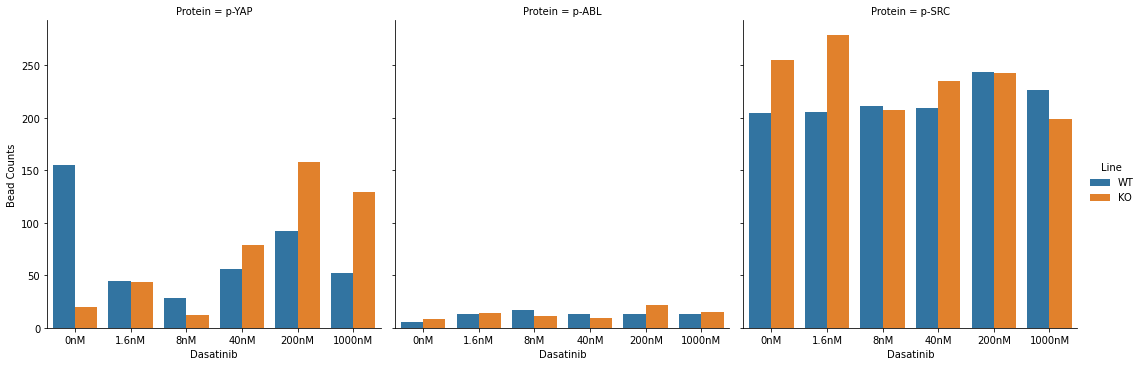

In [41]:
counts = pd.read_csv("msresist/data/Validations/DasatinibDR_YAP_ABL_SRC_Counts.csv")
counts = pd.melt(counts, id_vars=["Dasatinib", "Line"], value_vars=["p-YAP", "p-ABL", "p-SRC"], var_name="Protein", value_name="Bead Counts")

ax = sns.catplot(data=counts, x="Dasatinib", y="Bead Counts", hue="Line", col="Protein", kind="bar")

## Average Net MFI

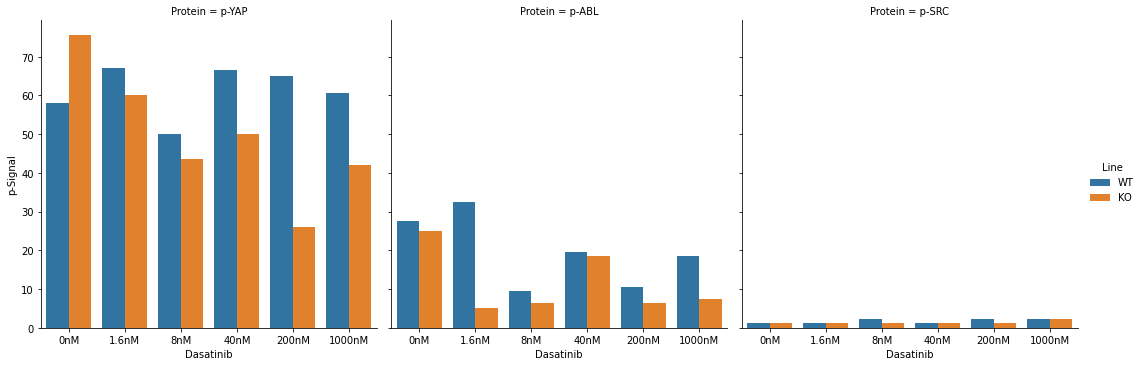

In [40]:
mfi = pd.read_csv("msresist/data/Validations/DasatinibDR_YAP_ABL_SRC_AvgNetMFI.csv")
mfi = pd.melt(mfi, id_vars=["Dasatinib", "Line"], value_vars=["p-YAP", "p-ABL", "p-SRC"], var_name="Protein", value_name="p-Signal")

ax = sns.catplot(data=mfi, x="Dasatinib", y="p-Signal", hue="Line", col="Protein", kind="bar")

## Median

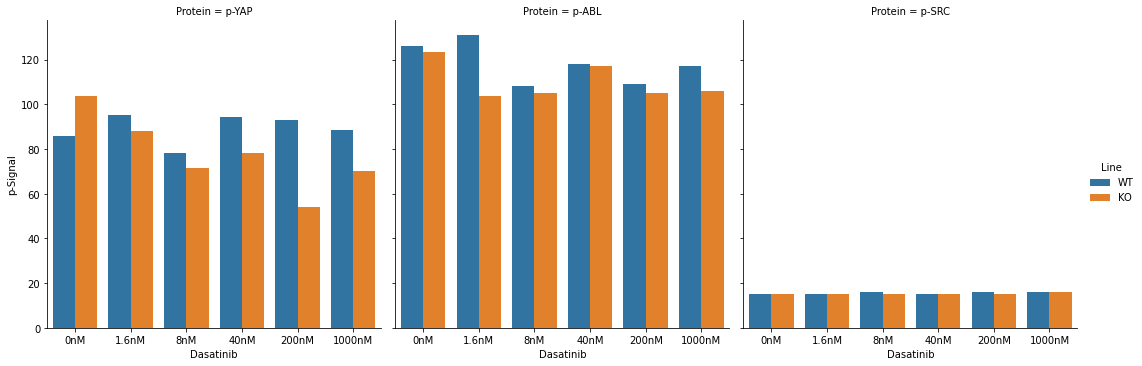

In [3]:
mfi = pd.read_csv("msresist/data/Validations/Luminex/DasatinibDR_YAP_ABL_SRC_Median.csv")
mfi = pd.melt(mfi, id_vars=["Dasatinib", "Line"], value_vars=["p-YAP", "p-ABL", "p-SRC"], var_name="Protein", value_name="p-Signal")

ax = sns.catplot(data=mfi, x="Dasatinib", y="p-Signal", hue="Line", col="Protein", kind="bar")

## EXPERIMENT 2
## Bead Counts

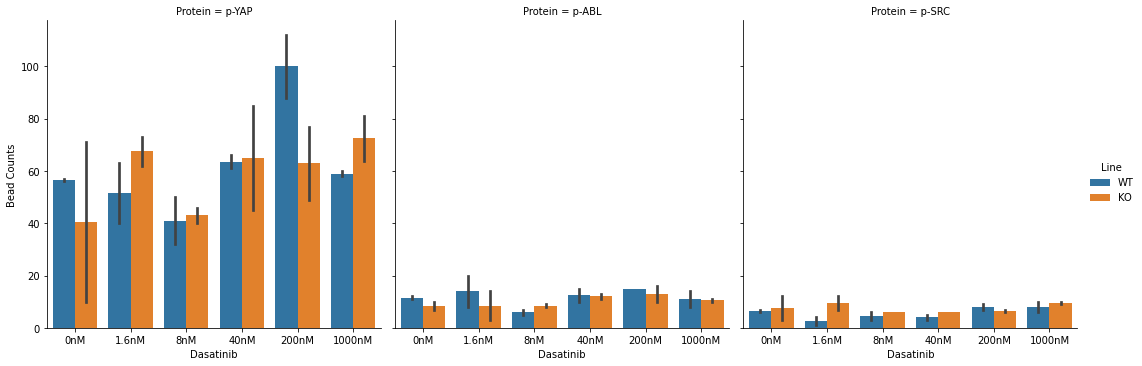

In [7]:
counts = pd.read_csv("msresist/data/Validations/Luminex/DasatinibDR_YAP_ABL_SRC_Counts_BR2.csv")
counts = pd.melt(counts, id_vars=["Dasatinib", "Line"], value_vars=["p-YAP", "p-ABL", "p-SRC"], var_name="Protein", value_name="Bead Counts")

sns.catplot(data=counts, x="Dasatinib", y="Bead Counts", hue="Line", col="Protein", kind="bar")

## Median MFI

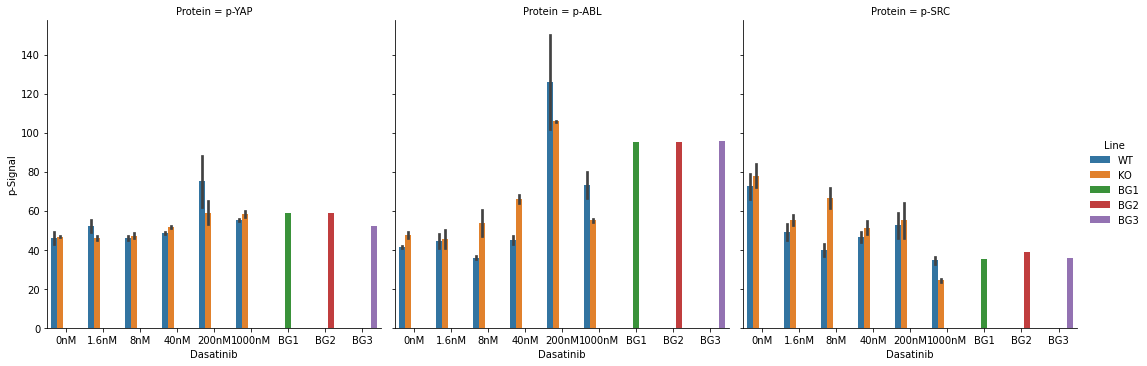

In [2]:
mfi = pd.read_csv("msresist/data/Validations/Luminex/DasatinibDR_YAP_ABL_SRC_Median_BR2.csv")
mfi = pd.melt(mfi, id_vars=["Dasatinib", "Line"], value_vars=["p-YAP", "p-ABL", "p-SRC"], var_name="Protein", value_name="p-Signal")

ax = sns.catplot(data=mfi, x="Dasatinib", y="p-Signal", hue="Line", col="Protein", kind="bar")

## EXPERIMENT 3
## Bead Counts

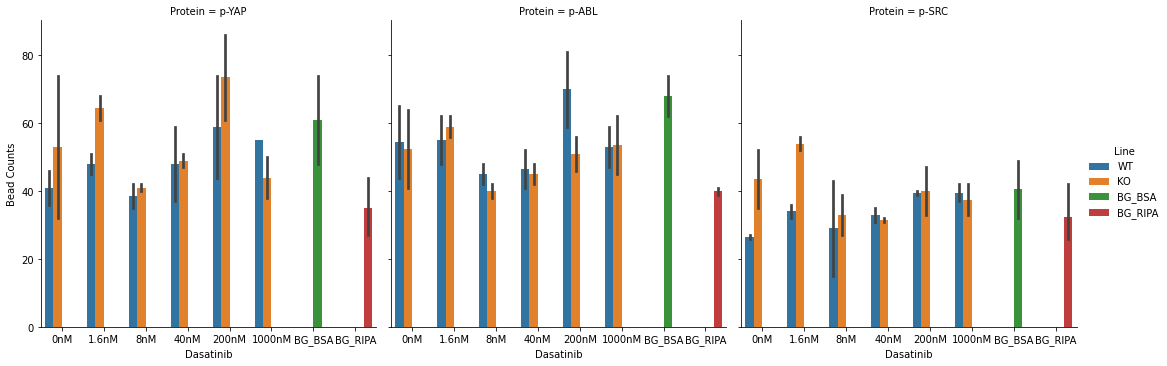

In [2]:
counts = pd.read_csv("msresist/data/Validations/Luminex/DasatinibDR_YAP_ABL_SRC_Counts_BR3.csv")
counts = pd.melt(counts, id_vars=["Dasatinib", "Line"], value_vars=["p-YAP", "p-ABL", "p-SRC"], var_name="Protein", value_name="Bead Counts")

sns.catplot(data=counts, x="Dasatinib", y="Bead Counts", hue="Line", col="Protein", kind="bar")

## Median

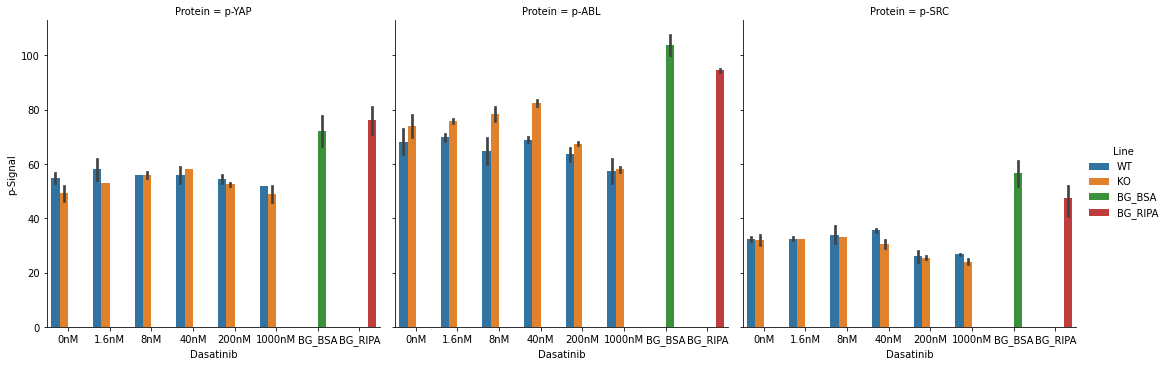

In [4]:
mfi = pd.read_csv("msresist/data/Validations/Luminex/DasatinibDR_YAP_ABL_SRC_Median_BR3.csv")
mfi = pd.melt(mfi, id_vars=["Dasatinib", "Line"], value_vars=["p-YAP", "p-ABL", "p-SRC"], var_name="Protein", value_name="p-Signal")

ax = sns.catplot(data=mfi, x="Dasatinib", y="p-Signal", hue="Line", col="Protein", kind="bar")

## EXPERIMENT 4

In [2]:
mfi = pd.read_csv("msresist/data/Validations/Luminex/DasatinibDR_Median_BR4.csv")
mfi.head()

,Dasatinib,Line,Lysate_Con,p-YAP,p-ABL,p-SRC,p-MEK
0,0nM,WT,5,68.0,101.0,42.0,26.0
1,1.6nM,WT,5,67.5,87.5,40.5,28.0
2,8nM,WT,5,83.0,96.0,43.0,28.5
3,40nM,WT,5,70.0,94.5,41.0,25.0
4,200nM,WT,5,65.0,90.5,33.0,25.0


Text(0.5, 0.98, 'PC9 WT')

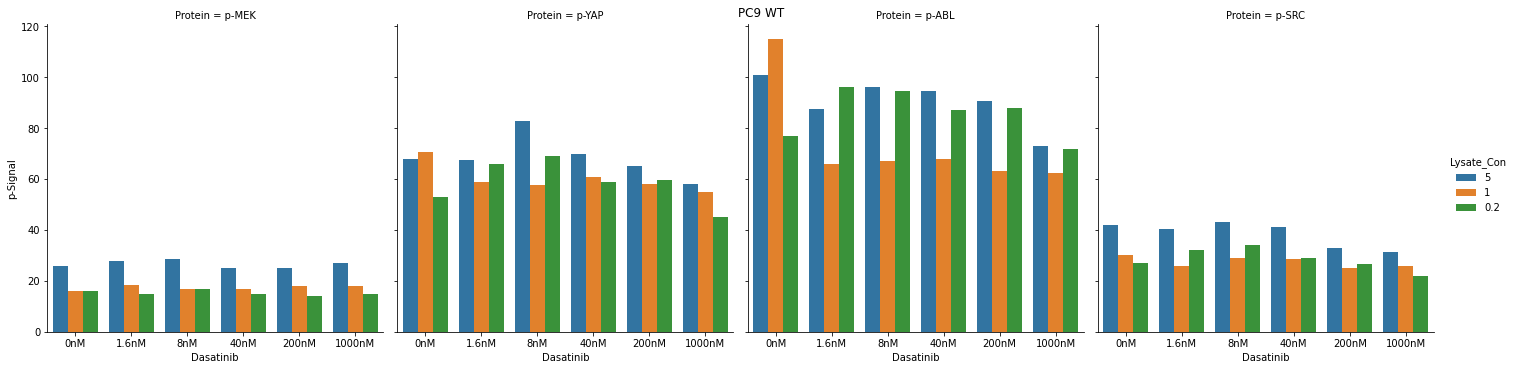

In [12]:
mfi = pd.read_csv("msresist/data/Validations/Luminex/DasatinibDR_Median_BR4.csv")
mfi = pd.melt(mfi, id_vars=["Dasatinib", "Line", "Lysate_Con"], value_vars=["p-MEK", "p-YAP", "p-ABL", "p-SRC"], var_name="Protein", value_name="p-Signal")

mfi_wt = mfi[mfi["Line"] == "WT"]
ax = sns.catplot(data=mfi_wt, x="Dasatinib", y="p-Signal", hue="Lysate_Con", col="Protein", kind="bar")
ax.fig.suptitle('PC9 WT')

Text(0.5, 0.98, 'PC9 KO')

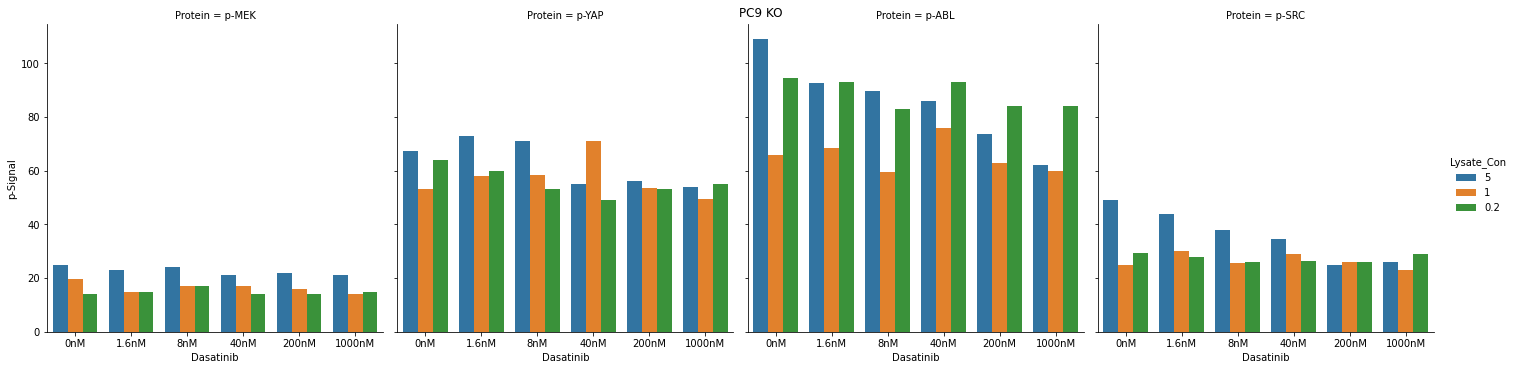

In [13]:
mfi_ko = mfi[mfi["Line"] == "KO"]
ax = sns.catplot(data=mfi_ko, x="Dasatinib", y="p-Signal", hue="Lysate_Con", col="Protein", kind="bar")
ax.fig.suptitle('PC9 KO')

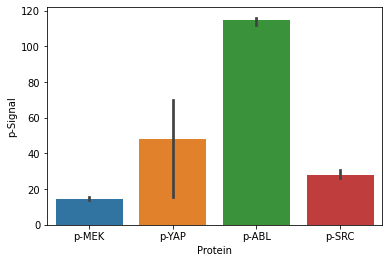

In [16]:
d = mfi[mfi["Line"] == "Background"]
ax = sns.barplot(data=d, x="Protein", y="p-Signal")

## Concentration Test

Text(0.5, 0.98, 'PC9 WT')

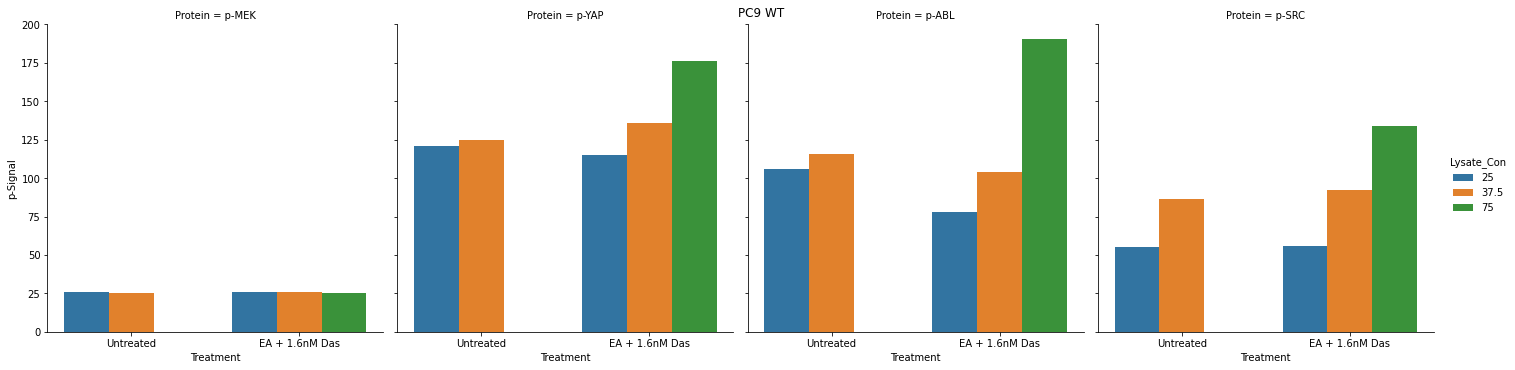

In [6]:
mfi = pd.read_csv("msresist/data/Validations/Luminex/Dasatinib_ConcTest_Median.csv")
mfi = pd.melt(mfi, id_vars=["Treatment", "Line", "Lysate_Con"], value_vars=["p-MEK", "p-YAP", "p-ABL", "p-SRC"], var_name="Protein", value_name="p-Signal")

mfi_wt = mfi[mfi["Line"] == "WT"]
ax = sns.catplot(data=mfi_wt, x="Treatment", y="p-Signal", hue="Lysate_Con", col="Protein", kind="bar")
ax.fig.suptitle('PC9 WT')

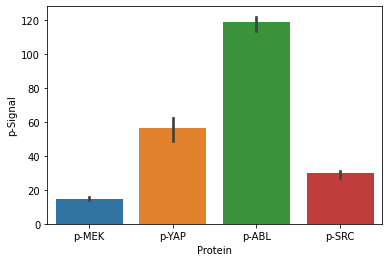

In [7]:
d = mfi[mfi["Line"] == "Background"]
ax = sns.barplot(data=d, x="Protein", y="p-Signal")